In [ ]:
pip install pandas numpy matplotlib scikit-learn

**PROJECT**

STEP1: CREATING A **DATASET**

In [ ]:
import pandas as pd

# Step 1: Create the dataset
data = {'Hours': [1, 2, 3, 4, 5],
        'Scores': [35, 45, 50, 60, 75]}

df = pd.DataFrame(data)
print(df)


   Hours  Scores
0      1      35
1      2      45
2      3      50
3      4      60
4      5      75


STEP2: **VISUALIZING** **THE** **DATASET**

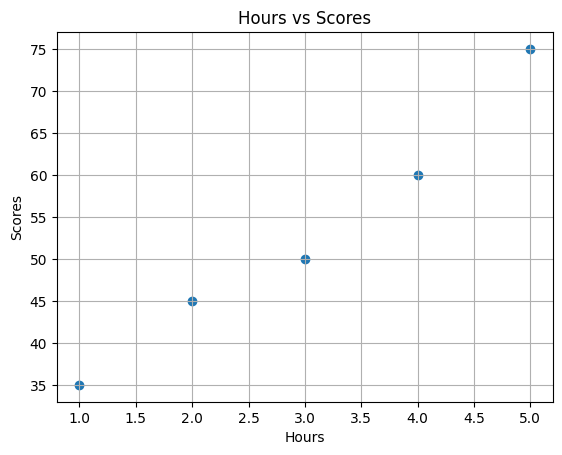

In [ ]:
import matplotlib.pyplot as plt
#Here we are trying to visualize the dataset before fitting the model. Therefore, we are making a scatter plot not line plot
#Line plot will connect the dots in order, assuming there is a sequance between them. But in ML, the data is not ordered to continuous like time series
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.grid()
plt.show()

STEP3: SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [ ]:
from sklearn.model_selection import train_test_split

X=df[['Hours']]
y=df['Scores']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
#We can put any number in random_state. It doesn't matter.


**STEP4: TRAINING THE LINEAR REGRESSION MODEL**

In [ ]:

from sklearn.linear_model import LinearRegression

#Step1: Create a model object
model=LinearRegression()

#Step2: Train the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


Slope (m): 9.714285714285712
Intercept (c): 23.428571428571438


**STEP5: MAKING PREDICTIONS USING THE TRAINED MODEL**

1. Prediction on new data

In [ ]:
hours=[[10]]
predicted_score=model.predict(hours)
print("Predicted Score for 10 hours of study:", predicted_score[0])

Predicted Score for 10 hours of study: 120.57142857142856


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2. Predicting on the dataset

In [ ]:
y_pred=model.predict(X_test).round(2)

result=pd.DataFrame({"Hours":X_test['Hours'], "Actual Score":y_test, "Predicted Score":y_pred})
print(result)

   Hours  Actual Score  Predicted Score
1      2            45            42.86


3. Visualization of Regression Line

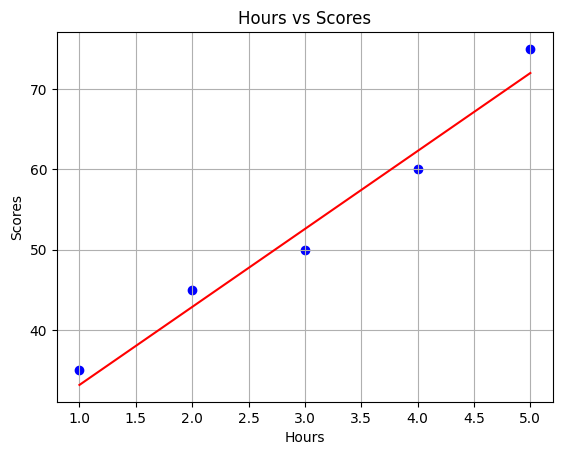

In [ ]:
line=model.coef_[0]*X+model.intercept_

#Actual Data Points
plt.scatter(X,y,color='blue')

#Regression line
plt.plot(X, line, color='red')

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.grid()
plt.show()

STEP6: EVALUATION OF MODEL

In [ ]:
from sklearn import metrics
import numpy as np

# Predict again (if not already done)
y_pred = model.predict(X_test)

# 1. Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)

# 2. Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)

# 3. Root Mean Squared Error
rmse = np.sqrt(mse)

# 4. R2 Score
r2 = metrics.r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.14
Mean Squared Error (MSE): 4.59
Root Mean Squared Error (RMSE): 2.14
R² Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
